In [10]:
from collections import defaultdict
import itertools
class Ornamentation(object):
    def __init__(self, T, ornaments = None):
        self.T = T
        self.ornaments = dict()
        for u in self.T:
            self.ornaments[u] = {u}
        if ornaments is not None:
            self.ornaments = ornaments
    def __le__(self, other):
        for u in self.T:
            if not(self.ornaments[u].issubset(other.ornaments[u])):
                return False
        return True
    def __eq__(self, other):
        for u in self.T:
            if not(self.ornaments[u] == other.ornaments[u]):
                return False
        return True    
    def __lt__(self, other):
        return (self <= other) and (self != other)
    
    def __hash__(self):
        unhash = {hash(x):x for x in self.T}
        ornaments = []
        for v in sorted(unhash):
            ornaments.append((v, tuple(sorted(
                [hash(x) for x in self.ornaments[unhash[v]]]))))
        return hash(tuple(sorted(ornaments)))
    
    def __repr__(self):
        return str(self.ornaments)
    def __str__(self):
        return str(self.ornaments)

        
def get_ornamentations_lattice(Tree):
    #T must be a rooted tree with its minimal element at the bottom
    #The vertices of T must be hashable (e.g. integers)
        
    Tree = Poset(Tree)
    ornaments = []
    G = Tree.hasse_diagram().to_undirected()
    for H in G.connected_subgraph_iterator():
        m = Tree.subposet(H).minimal_elements()[0]
        ornaments.append((m, set(H)))
    base_set = set(Tree)
        
    unhash = dict()
    for x in base_set:
        unhash[hash(x)] = x
        
    new_ornaments = [(hash(orn[0]), {hash(y) for y in orn[1]}) for orn in ornaments]
    
    ornament_graph = defaultdict(list)
    for x, y in itertools.combinations(new_ornaments, r = 2):
        if x[0] == y[0]:
            continue
        
        S = set(x[1])
        T = set(y[1])
        compat = True
        if len(S.intersection(T)) == 0:
            ornament_graph[(x[0], tuple(sorted(x[1])))].append((y[0], tuple(sorted(y[1]))))
        if not((y[0] in S and not(T.issubset(S))) or (x[0] in T and not(S.issubset(T)))):
            ornament_graph[(x[0], tuple(sorted(x[1])))].append((y[0], tuple(sorted(y[1]))))
    ornamentations = Graph(ornament_graph).cliques_maximal()
    out = []
    for orn in ornamentations:
        obj = Ornamentation(Tree)
        for t in orn:
            obj.ornaments[unhash[t[0]]] = set([unhash[x] for x in t[1]])
        out.append(obj)
    d = dict()
    ornamentations = out
    for orn in ornamentations:
        d[orn] = []
    for o1 in ornamentations:
        for o2 in ornamentations:
            if o1 < o2:
                d[o1].append(o2)
                
    return LatticePoset(d)

def length_of_max_length_chain(T):
    L = get_ornamentations_lattice(T)
    return L.height()

# def get_max_len_chains(Tree):
#     L = get_ornamentations_lattice(Tree)
#     max_chains = L.maximal_chains()
#     max_len_chains = []
#     for chain in max_chains:
#         if len(chain) == length_of_max_length_chain(Tree):
#             max_len_chains.append(chain)
#     return max_len_chains

def get_max_len_chains(tree):
   L = get_ornamentations_lattice(tree)
   max_chains = L.maximal_chains()
   max_len = max(len(chain) for chain in max_chains)
   max_length_chains = [chain for chain in max_chains if len(chain) == max_len]
   return max_length_chains

def num_of_max_len_chains(Tree):
    return len(get_max_len_chains(Tree))


# def get_spine(Tree):
#     maxlength = get_max_len_chains(Tree)
#     elements = set()
#     for chain in maxlength:
#         elements.update(chain) 
#     return elements

def get_spine(T):
   mlchains = get_max_len_chains(T)
   spine = set()
   for chain in mlchains:
      for ornamentation in chain:
         spine.add(ornamentation)
   spine_list = list(spine)
   return spine_list
    
def num_elements_of_spine(Tree):
    return len(get_spine(Tree))

def get_join_irreducibles(Tree):
    elements = get_spine(Tree)
    max_len_chains = get_max_len_chains(Tree)
    
    relations = []
    for chain in max_len_chains:
        for i in range(len(chain) - 1):
            relations.append((chain[i], chain[i + 1]))
            
    P_new = Poset((elements, relations))
    
    L = LatticePoset(P_new)
    L.join_irreducibles_poset()
    joinirr = L.join_irreducibles_poset()
    return joinirr


def num_elements_joinirr(Tree):
    return len(get_join_irreducibles(Tree))

def num_ornamentations(Tree):
    lattice = get_ornamentations_lattice(Tree)
    return len(lattice)

def Ordered_to_Rooted(n):
    return [RootedTree(S) for S in OrderedTrees(n)]

def statistic(tree):
    return Ordered_to_Rooted(tree.node_number()).count(RootedTree(tree))

def if_spine(ornamentation, T):
   spine = get_spine(T)
   if ornamentation in spine:
      return True
   return False

def hypothesis_classification(ornamentation, T):
   for node in T:
      node_image = ornamentation.ornaments[node]
      for child in T[node]:

         child_image = ornamentation.ornaments[child]

         if len(child_image) != 1 and not child_image.issubset(node_image):
            return False
   return True

In [22]:
def Broom(m, n): #B_m,n = Broom(m+1, n)
    broom = dict()
    leaves = []
    for i in range(m-1):
        broom[i] = [i+1]
    for j in range(n):
        leaves.append(m+j-1)
    broom[m-2] = leaves
    broomTree = Poset(broom)
    # cardinality = 0
    # Lattice = get_ornamentations_lattice(broomTree)
    # for orn in Lattice:
    #     cardinality = cardinality + 1
    # broomTree.show(figsize = 2)  
    # Lattice.show(figsize = 6)
    # print("Cardinality of O(T) =", cardinality)
    return broomTree

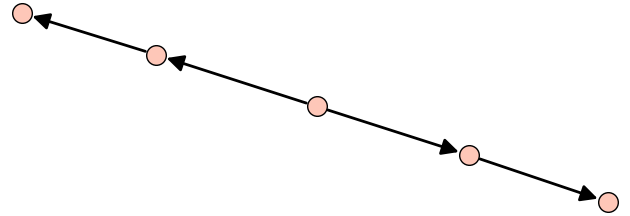

In [23]:
P = Poset(T)
J = get_join_irreducibles(P)
J.hasse_diagram().plot(vertex_labels = False)

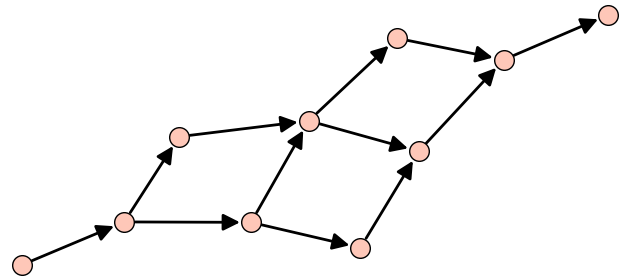

In [113]:
B1 = Broom(5, 1)
B2 = Broom(5, 2)
B3 = Broom(5, 3)

J1 = get_join_irreducibles(B1)
J1.hasse_diagram().plot(vertex_labels = False)

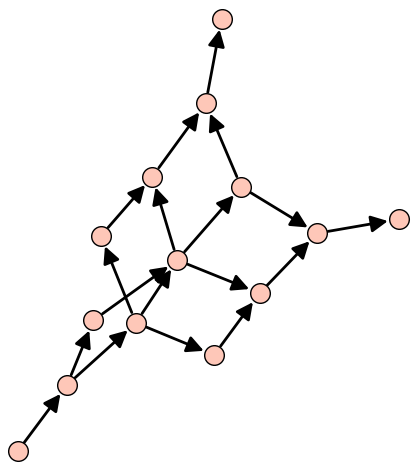

In [45]:
J2 = get_join_irreducibles(B2)
J2.hasse_diagram().plot(vertex_labels = False)

{0: {0, 1, 2, 3, 4}, 1: {1}, 2: {2}, 3: {3}, 4: {4}}
{0: {0, 1, 2, 3, 4}, 1: {1, 2, 3, 4}, 2: {2}, 3: {3}, 4: {4}}
{0: {0, 1, 2, 3, 4}, 1: {1, 2, 3, 4}, 2: {2, 3, 4}, 3: {3}, 4: {4}}
{0: {0, 1, 2, 3, 4}, 1: {1, 2, 3, 4}, 2: {2, 3, 4}, 3: {3, 4}, 4: {4}}


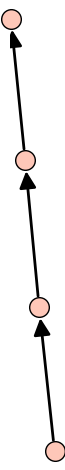

In [92]:
filtered_elements = []
for orn in J1:
    for i in range(0, 4):
        if 4 in orn.ornaments[i]:
                # print(orn)
                filtered_elements.append(orn)
                break
          
for orn in filtered_elements:
    print(orn)

filtered_relations = [
    (x, y) for (x, y) in J1.cover_relations()
    if x in filtered_elements and y in filtered_elements]

new_J1 = Poset((filtered_elements, filtered_relations))
new_J1.hasse_diagram().plot(vertex_labels = False)

{0: {0, 1, 2, 3, 5}, 1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}
{0: {0, 1, 2, 3, 4}, 1: {1}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}
{0: {0, 1, 2, 3, 5}, 1: {1, 2, 3, 5}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}
{0: {0, 1, 2, 3, 4}, 1: {1, 2, 3, 4}, 2: {2}, 3: {3}, 4: {4}, 5: {5}}
{0: {0, 1, 2, 3, 4}, 1: {1, 2, 3, 4}, 2: {2, 3, 4}, 3: {3}, 4: {4}, 5: {5}}
{0: {0, 1, 2, 3, 4}, 1: {1, 2, 3, 4}, 2: {2, 3, 4}, 3: {3, 4}, 4: {4}, 5: {5}}
{0: {0, 1, 2, 3, 5}, 1: {1, 2, 3, 5}, 2: {2, 3, 5}, 3: {3}, 4: {4}, 5: {5}}
{0: {0, 1, 2, 3, 5}, 1: {1, 2, 3, 5}, 2: {2, 3, 5}, 3: {3, 5}, 4: {4}, 5: {5}}


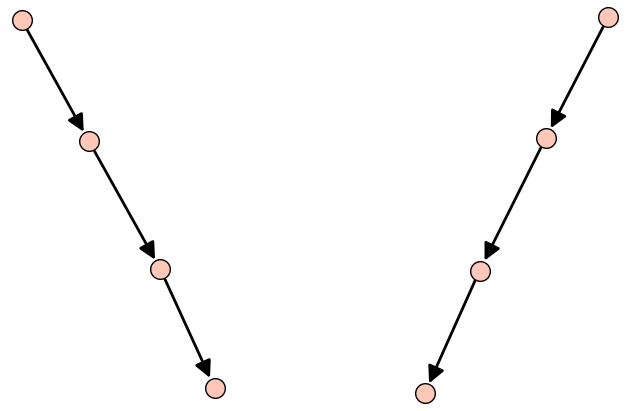

In [115]:
# Idea
# We need to check each ornamentation to see where all leaves are singletons and remove them. Now just to figure out how

filtered_elements = []
for orn in J2:
    for i in range(0, 4):
        if 4 in orn.ornaments[i] or 5 in orn.ornaments[i]:
                print(orn)
                filtered_elements.append(orn)
                break
          
# for orn in filtered_elements:
#     print(orn)

filtered_relations = [
    (x, y) for (x, y) in J2.cover_relations()
    if x in filtered_elements and y in filtered_elements]

new_J2 = Poset((filtered_elements, filtered_relations))
new_J2.hasse_diagram().plot(vertex_labels = False)

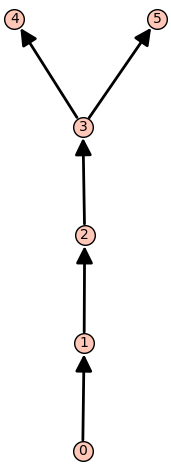

In [116]:
B2.plot()